C:\Users\girish\AppData\Local\Temp\ipykernel_1400\944493566.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_funding, x='Year', y='Amount', palette='mako')


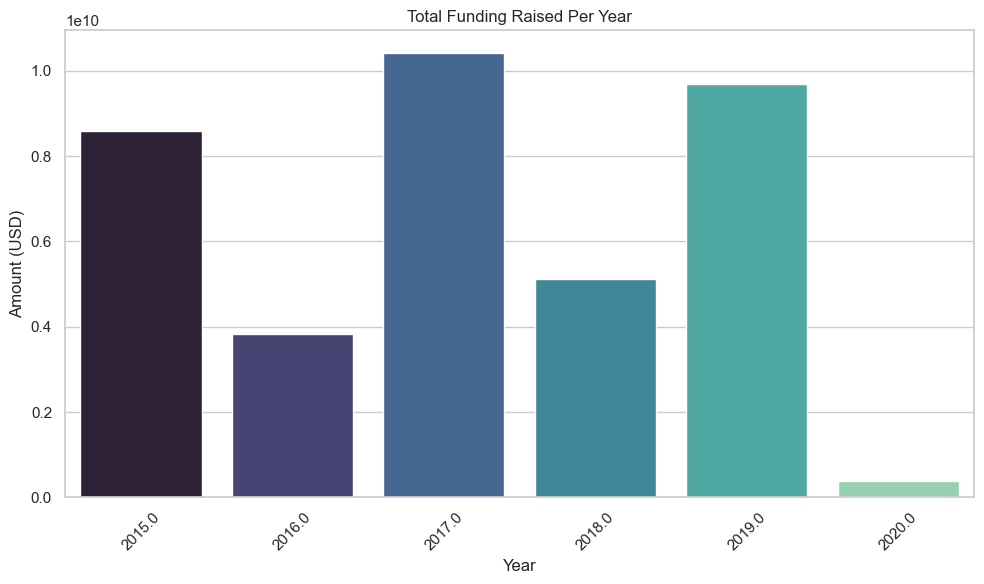

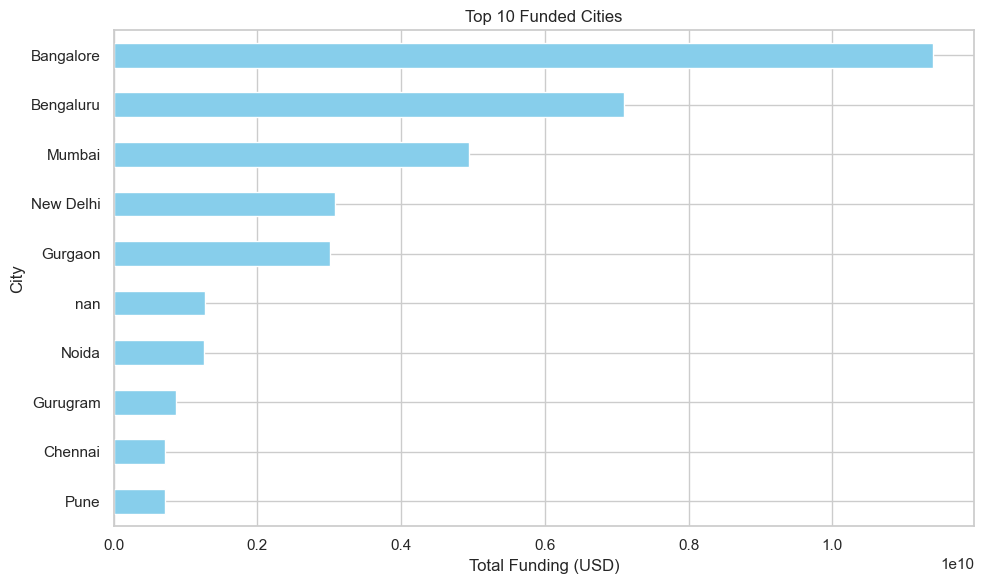

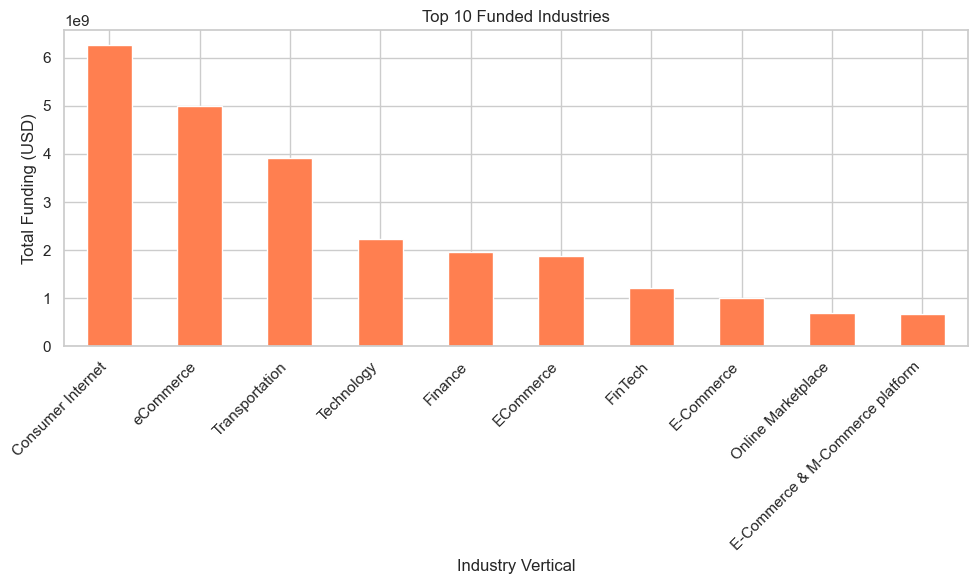

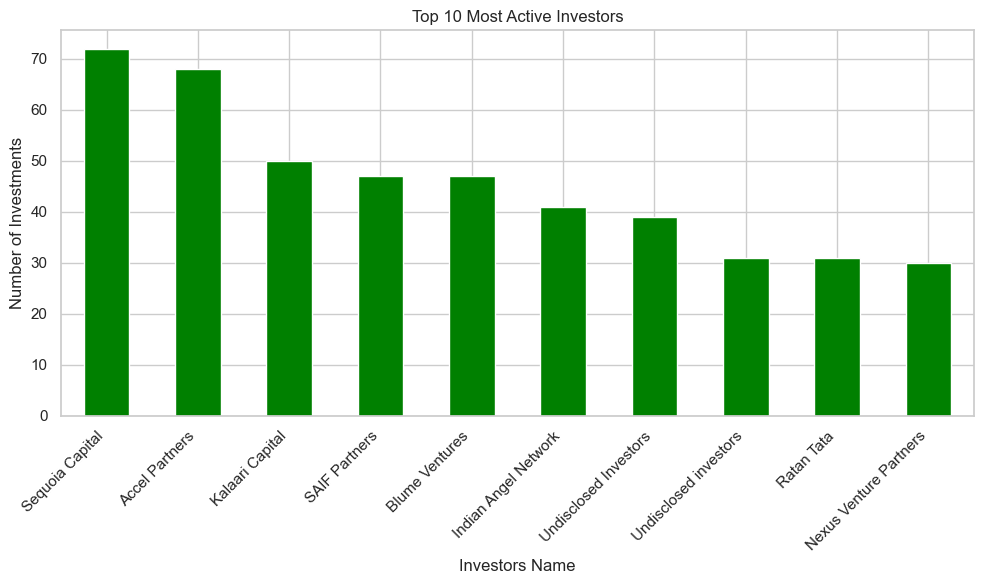

In [20]:

import matplotlib.pyplot as plt
import seaborn as sns

# For cleaner plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)





# Import libraries
import pandas as pd

# Load dataset
df = pd.read_csv('../data/startup_funding.csv', encoding='utf-8')

# Show first few rows
df.head()



# Clean all column names: remove leading/trailing spaces and fix double spaces
df.columns = df.columns.str.strip().str.replace(r'\s+', ' ', regex=True)

df.rename(columns={
    'City Location': 'City',
    'Startup Name': 'Startup',
    'InvestmentnType': 'Investment Type',
    'Amount in USD': 'Amount',
    'Date dd/mm/yyyy': 'Date'
}, inplace=True)

df['City'].unique()
df['Investment Type'].unique()

# Convert Date to datetime, errors='coerce' will handle invalid formats
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

# Check if any dates couldn't be parsed
df['Date'].isnull().sum()

# Remove commas and convert to float
df['Amount'] = df['Amount'].str.replace(',', '')
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Check summary
df['Amount'].describe()

# Keep only the first city in multi-location entries
df['City'] = df['City'].astype(str).apply(lambda x: x.split('/')[0].strip())

# Fill missing values
df['City'] = df['City'].replace('', 'Unknown')
df['City'] = df['City'].fillna('Unknown')

# View unique cities
df['City'].unique()

# Remove URLs
df['Startup'] = df['Startup'].str.replace(r'http\S+', '', regex=True).str.strip()


# Extract year
df['Year'] = df['Date'].dt.year

# Total funding per year
yearly_funding = df.groupby('Year')['Amount'].sum().reset_index()

# Plot
sns.barplot(data=yearly_funding, x='Year', y='Amount', palette='mako')
plt.title('Total Funding Raised Per Year')
plt.ylabel('Amount (USD)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


top_cities = df.groupby('City')['Amount'].sum().sort_values(ascending=False).head(10)

# Plot
top_cities.plot(kind='barh', color='skyblue')
plt.title('Top 10 Funded Cities')
plt.xlabel('Total Funding (USD)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


top_industries = df.groupby('Industry Vertical')['Amount'].sum().sort_values(ascending=False).head(10)

# Plot
top_industries.plot(kind='bar', color='coral')
plt.title('Top 10 Funded Industries')
plt.ylabel('Total Funding (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Drop missing values before counting
top_investors = df['Investors Name'].dropna().str.split(',').explode().str.strip()
top_investors = top_investors[top_investors != '']
top_investors = top_investors.value_counts().head(10)

# Plot
top_investors.plot(kind='bar', color='green')
plt.title('Top 10 Most Active Investors')
plt.ylabel('Number of Investments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()






# 📌 Key Takeaways from Startup Funding Analysis

- 🔼 **Funding peaked in 2017** with over 100$ billion raised.
- 🏙️ **Top funded cities** include Bengaluru, Mumbai, and Delhi.
- 🏭 **E-Commerce, FinTech, and EdTech** were the most invested industries.
- 💰 **Most common investment type**: Series A and Seed Round.
- 👨‍💼 **Sequoia Capital**, **Tiger Global**, and **Accel** were the top investors.
- 💡 This analysis helped uncover trends in Indian startup funding from 2015 to 2020.
